In [ ]:
# Establish a connection to the database 
import pymysql.cursors
import pandas as pd
connection = pymysql.connect( 
    host='192.168.2.216', 
    user='root', 
    password='Aureole12', 
    database='dubaicopy', 
    cursorclass=pymysql.cursors.DictCursor 
) 

 

try: 
    with connection.cursor() as cursor: 
        # Execute SET statements 
        cursor.execute("SET @FINISHDATE = 20240313;") 
        cursor.execute("SET @FINISHTIME = 0;") 
        cursor.execute("SET @COMPANYID = 1;") 
        cursor.execute("SET @LANGUAGEID = 1;") 
        cursor.execute("SET @STARTDATE = 20230101;") 
        cursor.execute("SET @VAR0 = 'Master Builders Solutions Dubai, DIP site';") 

        # Define your SQL query 
        sql_query = """ 
        SELECT S.FEVENTID 
        ,CS.FSITE_NAME 
        ,PL.FPLINE AS FPLINE 
        ,S.FRESOURCEID 
        , UPPER(PR.FRESOURCECODE ) AS FRESOURCE 
        ,C1.FDOWNTIMEID AS FDOWNTIMEID 
        ,C1.FDOWNTIMECODE AS FDOWNTIMECODE 
        ,C2.FDOWNTIMECODE AS FPARENTDOWNTIMECODE  
        , IF(( IFNULL(NULLIF(DD1.FDOWNTIMENAME,''),'E' )='E'),C1.FDOWNTIMENAME,DD1.FDOWNTIMENAME ) AS FDOWNTIMENAME  
        , IF(( IFNULL(NULLIF(DD2.FDOWNTIMENAME,''),'E' )='E'),C2.FDOWNTIMENAME,DD2.FDOWNTIMENAME ) AS FPARENTDOWNTIMENAME  
        , IF(( IFNULL(NULLIF(CDD.FDEPARTMENTNAME,''),'E' )='E'),D.FDEPARTMENTNAME,CDD.FDEPARTMENTNAME ) AS FDEPARTMENT 
        , IF(( IFNULL(NULLIF(DCD.FCATEGORYNAME,''),'E' )='E'),DC.FCATEGORY,DCD.FCATEGORYNAME ) AS FDOWNTIMECATEGORY  
        , IFNULL(S.FACTUALSTARTDATE,0 ) AS FACTUALSTARTDATE, LPAD( IFNULL(S.FACTUALSTARTTIME,0 ),6,0 ) AS FACTUALSTARTTIME  
        , IF(( IFNULL(S.FACTUALFINISHDATE,0 )=0),@FINISHDATE,S.FACTUALFINISHDATE ) AS FACTUALFINISHDATE  
        , IF(( IFNULL(S.FACTUALFINISHDATE,0 )=0), LPAD(@FINISHTIME,6,0 ), LPAD( IFNULL(S.FACTUALFINISHTIME,0 ),6,0 ) ) AS FACTUALFINISHTIME  
        -- PLINE SHIFT VERSION CHANGES - Start 
        ,PS.FSHIFTID 
        ,PS.FSHIFTLENGTH 
        ,PS.FSHIFTSTARTTIME 
        ,PS.FSHIFTTYPE 
        ,PS.FFIRSTSHIFTSTARTTIME 
        -- PLINE SHIFT VERSION CHANGES - End 
        , DATE_FORMAT( STR_TO_DATE( IF(( IFNULL(S.FACTUALSTARTDATE,0 )=0),20000101,S.FACTUALSTARTDATE ),'%Y%m%d' ),'%Y-%b-%d' ) AS FACTSTARTDATE  
        , LPAD( IFNULL(S.FACTUALSTARTTIME,0 ),6,0 ) AS FACTSTARTTIME   
        , DATE_FORMAT( STR_TO_DATE( IF(( IFNULL(S.FACTUALFINISHDATE,0 )=0),@FINISHDATE,S.FACTUALFINISHDATE ),'%Y%m%d' ),'%Y-%b-%d' ) AS FACTFINISHDATE  
        , IF(( IFNULL(S.FACTUALFINISHDATE,0 )=0), LPAD(@FINISHTIME,6,0 ), LPAD( IFNULL(S.FACTUALFINISHTIME,0 ),6,0 ) ) AS FACTFINISHTIME  
        , IF(( IFNULL(S.FACTUALSTARTDATE,0 )=0),NULL , DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(S.FACTUALSTARTDATE,0 ), ' ' ), LPAD( IFNULL(S.FACTUALSTARTTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) AS FACTUALSTARTDATETIME  
        , IF(( IFNULL(S.FACTUALFINISHDATE,0 )=0), IF(( IFNULL(S.FACTUALSTARTDATE,0 )=0),NULL , DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(@FINISHDATE,0 ), ' ' ), LPAD( IFNULL(@FINISHTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) , DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(S.FACTUALFINISHDATE,0 ), ' ' ), LPAD( IFNULL(S.FACTUALFINISHTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) AS FACTUALFINISHDATETIME     
        ,TRIM( CONCAT( CONCAT(U.FLASTNAME, ' ' ), U.FFIRSTNAME ) ) AS FUSERNAME  
        , IF(( IFNULL(S.FFINISHDATE,0 )=0),NULL, DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT(S.FSTARTDATE, '' ), LPAD(S.FSTARTTIME,6,'0' ) ),'%Y%m%d%H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) AS FSTARTDATETIME  
        , IF(( IFNULL(S.FFINISHDATE,0 )=0),NULL, DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT(S.FFINISHDATE, '' ), LPAD(S.FFINISHTIME,6,'0' ) ),'%Y%m%d%H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) AS FFINISHDATETIME  
        , IFNULL(NULLIF(C1.FOEEIRRELEVANT,''),'N' ) AS FOEEIRRELEVANT  
        ,IF(( IFNULL(S.FACTUALSTARTDATE,0 )=0),NULL ,(TIMESTAMPDIFF(SECOND, IF(( IFNULL(S.FACTUALSTARTDATE,0 )=0),NULL , STR_TO_DATE( CONCAT( CONCAT( IFNULL(S.FACTUALSTARTDATE,0 ), ' ' ), LPAD( IFNULL(S.FACTUALSTARTTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' )) 
        ,IF(( IFNULL(S.FACTUALFINISHDATE,0 )=0), IF(( IFNULL(S.FACTUALSTARTDATE,0 )=0),NULL , STR_TO_DATE( CONCAT( CONCAT( IFNULL(@FINISHDATE,0 ), ' ' ), LPAD( IFNULL(@FINISHTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ) ) , STR_TO_DATE( CONCAT( CONCAT( IFNULL(S.FACTUALFINISHDATE,0 ), ' ' ), LPAD( IFNULL(S.FACTUALFINISHTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ) )) / 60)) AS FDURATION 
        , NULL AS FREPORTDATE 
        ,S.FDOWNTIME_COMMENT  
        , TRIM(LEADING '0' FROM S.FSOURCEPO) AS FAUFNR 
        , TRIM(LEADING 0 FROM PM.FIDHID) AS FIDHID 
        , PM.FECCODE 
        , PM.FIDHDESC 
        ,P.FMANFACTSTARTDATE,P.FMANFACTFINISHDATE,P.FMANFSTARTTIME,P.FMANFENDTIME  
        , IF(( IFNULL(P.FMANFACTSTARTDATE,0 )=0),NULL , DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(P.FMANFACTSTARTDATE,0 ), ' ' ), LPAD( IFNULL(P.FMANFSTARTTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) AS FMANFACTSTARTDATETIME  
        , IF(( IFNULL(P.FMANFACTFINISHDATE,0 )=0), IF(( IFNULL(P.FMANFACTFINISHDATE,0 )=0),NULL , DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(@FINISHDATE,0 ), ' ' ), LPAD( IFNULL(@FINISHTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) , DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(P.FMANFACTFINISHDATE,0 ), ' ' ), LPAD( IFNULL(P.FMANFENDTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) AS FMANFACTFINISHDATETIME 
        FROM LDB1_DOWNTIME_EVENTS S  
        INNER JOIN LDB1_COMPANYDOWNTIME C1 ON C1.FDOWNTIMEID=S.FEVENTTYPE  
        INNER JOIN LDB1_COMPANYDOWNTIME C2 ON C2.FDOWNTIMEID= IF(( IFNULL(C1.FPARENTDOWNTIMEID,0 )=0),C1.FDOWNTIMEID,C1.FPARENTDOWNTIMEID )  
        INNER JOIN LDB1_DOWNTIME DT ON DT.FDOWNTIMEID=C1.FDOWNTIMEID AND DT.FSITEID=S.FSITEID AND DT.FAREA='M'  
        INNER JOIN LDB1_DOWNTIME_CATEGORY DC ON DC.FCATEGORYID=C1.FCATEGORYID  
        INNER JOIN LDB1_COMPANYDEPARTMENT D ON D.FDEPARTMENTID=DT.FDEPARTMENTID  
        INNER JOIN LDB1_PRODUCTIONLINERESOURCE PR ON PR.FRESOURCEID=S.FRESOURCEID AND PR.FSTATUS='A'  
        INNER JOIN LDB1_PLANTPRODUCTIONLINE PL ON PL.FPLINEID=PR.FPLINEID AND PL.FSITEID=S.FSITEID AND PL.FSTATUS='A'  
        INNER JOIN LDB1_COUNTRY_SITES CS ON CS.FSITEID=S.FSITEID AND CS.FCOMPANYID=@COMPANYID AND CS.FSTATUS='A'  
        -- PLINE SHIFT VERSION CHANGES - Start 

        INNER JOIN LDB1_PLINESHIFTVERSIONINFO PS ON PS.FSITEID=S.FSITEID AND PS.FPLINEID=PL.FPLINEID  
        AND PS.FFROMDATE <=CASE WHEN IFNULL(S.FACTUALSTARTTIME, 0 ) >= PS.FFIRSTSHIFTSTARTTIME THEN IFNULL(S.FACTUALSTARTDATE, 0 )  
        ELSE TO_NUMBER( DATE_FORMAT(DATE_SUB( STR_TO_DATE( IFNULL(S.FACTUALSTARTDATE, 0 ),'%Y%m%d' ), INTERVAL 1 DAY ),'%Y%m%d' ) ) END  
        AND (PS.FTODATE >= CASE WHEN IFNULL(S.FACTUALSTARTTIME, 0 ) >= PS.FFIRSTSHIFTSTARTTIME THEN IFNULL(S.FACTUALSTARTDATE, 0 )  
        ELSE TO_NUMBER( DATE_FORMAT(DATE_SUB( STR_TO_DATE( IFNULL(S.FACTUALSTARTDATE, 0 ),'%Y%m%d' ), INTERVAL 1 DAY ),'%Y%m%d' ) ) END  
        OR IFNULL(PS.FTODATE,0 )=0 )  
        AND STR_TO_DATE( CONCAT( CONCAT(CASE WHEN S.FACTUALSTARTTIME>=PS.FFIRSTSHIFTSTARTTIME THEN S.FACTUALSTARTDATE  
        ELSE CASE WHEN PS.FSHIFTSTARTTIME<PS.FFIRSTSHIFTSTARTTIME THEN S.FACTUALSTARTDATE  
        ELSE TO_NUMBER( DATE_FORMAT(DATE_SUB( STR_TO_DATE(S.FACTUALSTARTDATE,'%Y%m%d' ), INTERVAL 1 DAY ),'%Y%m%d' ) ) END END , '' ) , LPAD(PS.FSHIFTSTARTTIME,6,0 ) ),'%Y%m%d%H%i%s' ) 
        <= STR_TO_DATE( CONCAT( CONCAT(S.FACTUALSTARTDATE , '' ) , LPAD(S.FACTUALSTARTTIME,6,0 ) ),'%Y%m%d%H%i%s' )  
        AND CASE WHEN IFNULL(PS.FTODATE,0 )>0 THEN CASE WHEN PS.FTODATE =  
        CASE WHEN IFNULL(S.FACTUALSTARTTIME, 0 ) >= PS.FFIRSTSHIFTSTARTTIME THEN IFNULL(S.FACTUALSTARTDATE, 0 )  
        ELSE TO_NUMBER( DATE_FORMAT(DATE_SUB( STR_TO_DATE( IFNULL(S.FACTUALSTARTDATE, 0 ),'%Y%m%d' ), INTERVAL 1 DAY ),'%Y%m%d' ) ) END  
        AND TO_NUMBER( DATE_FORMAT(DATE_ADD( STR_TO_DATE( LPAD(PS.FSHIFTSTARTTIME,6,'0' ),'%H%i%s' ), INTERVAL PS.FSHIFTLENGTH MINUTE ),'%H%i%s' ) ) = PS.FFIRSTSHIFTSTARTTIME  
        AND PS.FFIRSTSHIFTSTARTTIME > IFNULL(NULLIF((SELECT MIN(PS1.FFIRSTSHIFTSTARTTIME ) FROM LDB1_PLINESHIFTVERSIONINFO PS1 WHERE PS1.FSITEID = PS.FSITEID AND PS1.FPLINEID = PS.FPLINEID AND PS1.FSHIFTVERSIONID > PS.FSHIFTVERSIONID  
        AND PS.FTODATE = TO_NUMBER( DATE_FORMAT(DATE_SUB( STR_TO_DATE(PS1.FFROMDATE,'%Y%m%d' ), INTERVAL 1 DAY ),'%Y%m%d' ) ) ),''),PS.FFIRSTSHIFTSTARTTIME )  
        THEN (DATE_ADD( STR_TO_DATE( CONCAT( CONCAT(PS.FTODATE , '' ) , LPAD( IFNULL(NULLIF((SELECT MIN(PS1.FFIRSTSHIFTSTARTTIME ) FROM LDB1_PLINESHIFTVERSIONINFO PS1  
        WHERE PS1.FSITEID = PS.FSITEID AND PS1.FPLINEID = PS.FPLINEID AND PS1.FSHIFTVERSIONID > PS.FSHIFTVERSIONID  
        AND PS.FTODATE = TO_NUMBER( DATE_FORMAT(DATE_SUB( STR_TO_DATE(PS1.FFROMDATE,'%Y%m%d' ), INTERVAL 1 DAY ),'%Y%m%d' ) ) ),''),PS.FFIRSTSHIFTSTARTTIME ) ,6,'0' ) ),'%Y%m%d%H%i%s' ), INTERVAL 1 DAY ) )  
        ELSE (DATE_ADD( STR_TO_DATE( CONCAT( CONCAT(CASE WHEN S.FACTUALSTARTTIME>=PS.FFIRSTSHIFTSTARTTIME THEN S.FACTUALSTARTDATE  
        ELSE CASE WHEN PS.FSHIFTSTARTTIME<PS.FFIRSTSHIFTSTARTTIME THEN S.FACTUALSTARTDATE  
        ELSE TO_NUMBER( DATE_FORMAT(DATE_SUB( STR_TO_DATE(S.FACTUALSTARTDATE,'%Y%m%d' ), INTERVAL 1 DAY ),'%Y%m%d' ) ) END END, '' ) , LPAD(PS.FSHIFTSTARTTIME,6,'0' ) ),'%Y%m%d%H%i%s' ), INTERVAL PS.FSHIFTLENGTH MINUTE ) ) END  
        ELSE (DATE_ADD( STR_TO_DATE( CONCAT( CONCAT(CASE WHEN S.FACTUALSTARTTIME>=PS.FFIRSTSHIFTSTARTTIME THEN S.FACTUALSTARTDATE  
        ELSE CASE WHEN PS.FSHIFTSTARTTIME<PS.FFIRSTSHIFTSTARTTIME THEN S.FACTUALSTARTDATE  
        ELSE TO_NUMBER( DATE_FORMAT(DATE_SUB( STR_TO_DATE(S.FACTUALSTARTDATE,'%Y%m%d' ), INTERVAL 1 DAY ),'%Y%m%d' ) ) END END , '' ) , LPAD(PS.FSHIFTSTARTTIME,6,'0' ) ),'%Y%m%d%H%i%s' ), INTERVAL PS.FSHIFTLENGTH MINUTE ) ) END  
        > STR_TO_DATE( CONCAT( CONCAT(S.FACTUALSTARTDATE , '' ) , LPAD(S.FACTUALSTARTTIME,6,'0' ) ),'%Y%m%d%H%i%s' )  
        -- PLINE SHIFT VERSION CHANGES - End 

         

        LEFT OUTER JOIN LDB1_WOSUMMARY W ON W.FSITEID=S.FSITEID AND W.FAUFNR=S.FSOURCEPO 
        LEFT OUTER JOIN LDB1_CAUFV_HDR P ON P.FSITEID=S.FSITEID AND P.FAUFNR=S.FSOURCEPO 
        LEFT OUTER JOIN LDB1_PLANTMATERIAL PM ON PM.FSITEID=S.FSITEID AND PM.FIDHID=W.FMATNR AND PM.FSTATUS='A'  
        LEFT OUTER JOIN LDB1_USERINFO U ON U.FUSERID= IF(( IFNULL(S.FUPDATEDBY,0 )=0), IFNULL(S.FCREATEDBY,0 ),S.FUPDATEDBY )  
        LEFT OUTER JOIN LDB1_COMPANYDOWNTIMEDESC DD1 ON DD1.FLANGUAGEID=@LANGUAGEID AND DD1.FDOWNTIMEID=C1.FDOWNTIMEID  
        LEFT OUTER JOIN LDB1_COMPANYDOWNTIMEDESC DD2 ON DD2.FLANGUAGEID=@LANGUAGEID AND DD2.FDOWNTIMEID=C2.FDOWNTIMEID  
        LEFT OUTER JOIN LDB1_DOWNTIME_CATEGORYDESC DCD ON DCD.FLANGUAGEID=@LANGUAGEID AND DCD.FCATEGORYID=DC.FCATEGORYID  
        LEFT OUTER JOIN LDB1_COMPANYDEPARTMENTDESC CDD ON CDD.FLANGUAGEID=@LANGUAGEID AND CDD.FDEPARTMENTID=D.FDEPARTMENTID      
        WHERE IFNULL(S.FACTUALSTARTDATE,0 )<>0 AND IF(( IFNULL(S.FACTUALSTARTDATE,0 )=0),NULL , DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(S.FACTUALSTARTDATE,0 ), ' ' ), LPAD( IFNULL(S.FACTUALSTARTTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) )  
        <> IF(( IFNULL(S.FACTUALFINISHDATE,0 )=0), IF(( IFNULL(S.FACTUALSTARTDATE,0 )=0),NULL, DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(@FINISHDATE,0 ), ' ' ), LPAD( IFNULL(@FINISHTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) , DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(S.FACTUALFINISHDATE,0 ), ' ' ), LPAD( IFNULL(S.FACTUALFINISHTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) )  
        AND ( IFNULL(NULLIF(C1.FOEEIRRELEVANT,''),'N' )='N' OR IFNULL(NULLIF(C1.FDOWNTIMETYPE,''),'N' ) IN('E','N' ) )  
        AND IFNULL(NULLIF(C1.FDOWNTIMETYPE,''),'N' )<>'R' AND IFNULL(NULLIF(C2.FDOWNTIMETYPE,''),'N' )<>'R'  
        AND S.FACTUALSTARTDATE <= @FINISHDATE AND IF(( IFNULL(S.FACTUALFINISHDATE,0 )=0),99990101,S.FACTUALFINISHDATE ) >= @STARTDATE  
        AND UPPER(CS.FSITE_NAME ) IN (@VAR0 )  
        ORDER BY CS.FSITE_NAME,S.FSITEID,S.FRESOURCEID , STR_TO_DATE( CONCAT( CONCAT( IFNULL(S.FACTUALSTARTDATE,0 ), ' ' ), LPAD( IFNULL(S.FACTUALSTARTTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' )  
        """ 
        # Execute the SQL query 
        cursor.execute(sql_query) 

        # Fetch all the results 
        results = cursor.fetchall() 
        # Convert the results into a DataFrame 
        dt_df = pd.DataFrame(results) 
        #print(dt_df)
        temp_dt_df = dt_df
        print("Data stored in dataframe")
finally: 
    # Close the connection 
    connection.close()

In [ ]:

temp_dt_df.to_excel(f"E:\\zzzzzzzzzzzzzzzzz\\Dubai\\Downtime.xlsx")
temp_dt_df.head()

In [3]:
import pymysql.cursors
import pandas as pd
#Establish a connection to the database 
connection = pymysql.connect( 
    host='192.168.2.216', 
    user='root', 
    password='Aureole12', 
    database='dubaicopy', 
    cursorclass=pymysql.cursors.DictCursor 
)


try: 
    with connection.cursor() as cursor: 
        # Execute SET statements 
        cursor.execute("SET @FROMDATE = 20230101;") 
        cursor.execute("SET @TODATE = 20240313;") 
        cursor.execute("SET @SITEID = 1;") 
        cursor.execute("SET @CURRENTDATE = 20240313;") 
        cursor.execute("SET @CURRENTTIME = 235959;") 

        # Define your SQL query 
        sql_query = """ 
       -- Outer Query - Start
 
        SELECT FAUFNR
        ,FCHARG
        ,FMATNR
        ,FIDHDESC
        ,FPLINEID ,FPLINE
        ,FRESOURCEID ,FRESOURCECODE
         
        ,FMEINS
        ,FTOTALQTY
         
        ,A.FMANFACTSTARTDATETIME
        ,A.FMANFACTFINISHDATETIME
        ,FDURATION AS FORDER_DURATION
         
        ,FTOTALFINISHEDQTY
        ,FTOTALREJECTQTY
         
        ,FPACKSIZE
        -- New Change Start
        ,FSTDRATE
        ,FSTDQTY
        -- New Change End
         
        ,ROUND(IF(IFNULL(FPACKSIZE,0)=0 || IFNULL(FDURATION,0) = 0, 0,((FTOTALFINISHEDQTY/FPACKSIZE) * (60/ FDURATION))),2) AS FACTUALRATE_WITHOUT_DT
         
         
        FROM (
         
        -- Outer Query - End
         
        -- New Change Start
        SELECT DISTINCT TRIM(LEADING '0' FROM P.FAUFNR) AS FAUFNR
        -- New Change End
        ,P.FCHARG
         
        , TRIM(LEADING '0' FROM P.FMATNR ) AS FMATNR
        ,M.FIDHDESC
         
        , IF(( IFNULL(POPL.FPLINEID,0 )=0 ), IFNULL(PL.FPLINEID ,0 ),POPL.FPLINEID ) AS FPLINEID 
        , IF(( IFNULL(NULLIF(POPL.FPLINE,'' ),'E' )='E' ), IFNULL(NULLIF(PL.FPLINE,'' ),'' ), IFNULL(NULLIF(POPL.FPLINE,'' ),'' ) ) AS FPLINE
         
        , IF(( IFNULL(NULLIF(P.FMANFCATEGORY,'' ),'E' )='E' ),P.FCATEGORY,P.FMANFCATEGORY ) AS FRESOURCECODE
        , PR.FRESOURCEID
         
        ,P.FMEINS
        , IFNULL(P.FTOTALQTY,0 ) AS FTOTALQTY
         
        -- ,P.FMANFACTSTARTDATE
        -- ,P.FMANFACTFINISHDATE
        -- ,P.FMANFSTARTTIME
        -- ,P.FMANFENDTIME
         
        , IF(( IFNULL(P.FMANFACTSTARTDATE,0 )=0),NULL , DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(P.FMANFACTSTARTDATE,0 ), ' ' ), LPAD( IFNULL(P.FMANFSTARTTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) AS FMANFACTSTARTDATETIME  
        , IF(( IFNULL(P.FMANFACTFINISHDATE,0 )=0), NULL, DATE_FORMAT( STR_TO_DATE( CONCAT( CONCAT( IFNULL(P.FMANFACTFINISHDATE,0 ), ' ' ), LPAD( IFNULL(P.FMANFENDTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ),'%Y-%b-%d %h:%i:%s %p' ) ) AS FMANFACTFINISHDATETIME
         
        ,P.FTOTALULLAGEQTY
        ,P.FTOTALFINISHEDQTY
        ,P.FTOTALREJECTQTY
        ,P.FFG_PARTQTY
        ,P.FMANHOUR
        ,P.FMACHINEHOUR
         
        , IFNULL(NULLIF(P.FHDRSTATUS,'' ),'N' ) AS FHDRSTATUS
        , IFNULL(NULLIF(P.FQISTATUS,'' ),'N' ) AS FQISTATUS
         
        ,IF(( IFNULL(P.FMANFACTSTARTDATE,0 )=0),NULL ,(TIMESTAMPDIFF(SECOND, IF(( IFNULL(P.FMANFACTSTARTDATE,0 )=0),NULL , STR_TO_DATE( CONCAT( CONCAT( IFNULL(P.FMANFACTSTARTDATE,0 ), ' ' ), LPAD( IFNULL(P.FMANFSTARTTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' )) 
        ,IF(( IFNULL(P.FMANFACTFINISHDATE,0 )=0), IF(( IFNULL(P.FMANFACTSTARTDATE,0 )=0),NULL , STR_TO_DATE( CONCAT( CONCAT( IFNULL(@CURRENTDATE,0 ), ' ' ), LPAD( IFNULL(@CURRENTTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ) ) , STR_TO_DATE( CONCAT( CONCAT( IFNULL(P.FMANFACTFINISHDATE,0 ), ' ' ), LPAD( IFNULL(P.FMANFENDTIME,0 ),6,0 ) ),'%Y%m%d %H%i%s' ) )) / 60)) AS FDURATION
         
        -- New Change Start
        ,SPI.FPACK_SIZE AS FPACKSIZE
        ,SPI.FCYCLETIME AS FSTDRATE
        ,SPI.FSTDQTY
        -- New Change End
         
        ,P.FTOTAL_CYCLETIME
        ,P.FAUART
        ,M.FMRPCONTROLLER
        -- ,M.FIS_EAR_IDH 
        , IFNULL(NULLIF(POPL.FHAS_AUTO_PHASE_TRANS,'' ),'N' ) AS FHAS_AUTO_PHASE_TRANS 
        ,P.FPREWEIGHSCHDLDATE
        ,P.FPREWEIGHSCHDTIME
        ,P.FSCHDLDATE 
        ,P.FSCHDLTIME
        ,P.FPLANNEDDATE
        ,P.FPLANNEDTIME 
        ,P.FMANFPLANNEDDATE
        ,P.FMANFPLANNEDTIME
        ,P.FPREWEIGHACTSTRDATE
        ,P.FPREWEIGHACTFINDATE
        ,P.FPREWEIGHSTARTTIME
        ,P.FPREWEIGHENDTIME 
        ,P.FMANFACTSTARTDATE
        ,P.FMANFACTFINISHDATE
        ,P.FMANFSTARTTIME
        ,P.FMANFENDTIME
        ,P.FSTARTDATE AS FSAP_STARTDATE 
        ,P.FFINISHDATE AS FSAP_FINISHDATE
        ,FSTARTTIME
        ,FFINISHTIME
        ,M.FECCODE
        , IF(( IFNULL(NULLIF(P.FMPAUFNR,'' ),'E' )='E' ),P.FPAUFNR,P.FMPAUFNR ) AS FBULKORDER 
        ,P.FFILLINGSTARTDATE
        ,P.FFILLINGSTARTTIME
        ,P.FFILLINGENDDATE
        ,P.FFILLINGENDTIME
        , CONCAT( IFNULL(NULLIF(FS.FLASTNAME,'' ), ' ' ) , CONCAT(' ' , FS.FFIRSTNAME ) ) AS FFILLING_STARTED_BY 
        , IF(( IFNULL(NULLIF(POPL.FPWORKSHOP,'' ),'E' )='E' ), PL.FPWORKSHOP,POPL.FPWORKSHOP ) AS FPWORKSHOP 
        ,P.FISSPECIALBATCH
        , IFNULL(P.FFILLINGSOPID,0 ) AS FSOPID
        , IFNULL(P.FFILLINGSOPGROUPID,0 ) AS FSOPGROUPID
        ,P.FPRODUCTION_NOTES
        ,ST.FAVAILABLESTOCKUPDATEDDATETIME
        , IFNULL(NULLIF(P.FCATEGORY,'' ),'' ) AS FCATEGORY
        ,SO.FTYPE 
        , CONCAT( IFNULL(NULLIF(OP1.FLASTNAME,'' ), ' ' ) , CONCAT(' ' , OP1.FFIRSTNAME ) ) AS FPRODUCTION_OPERATOR1, 
        CONCAT( IFNULL(NULLIF(OP2.FLASTNAME,'' ), ' ' ) , CONCAT(' ' , OP2.FFIRSTNAME ) ) AS FPRODUCTION_OPERATOR2 
        ,P.FPRODUCTION_OPERATOR1_ID
        ,P.FPRODUCTION_OPERATOR2_ID
        ,M.FSPECIALBULK_FG
        ,M.FSPECIALBULK_IND_VALIDITY
        ,M.FSPECIALBULK_IND_CNT
        ,P.FRESYNCREQUIRED
        ,P.FREQFILLINGDATE 
        ,PL.FDCS_IDENTIFIER
        ,P.FRECIPE
        ,P.FRECIPEGROUP
        ,P.FALTBOM
        , IFNULL(P.FFILLINGSOPID,0 ) AS FFILLINGSOPID
        , IFNULL(SH.FSOPID,0 ) AS FPRODUCT_SOPID 
        ,DS.FCUSTOMER_NAME AS FCUSTOMERNAME
        ,P.FSOLDTONUM AS FCUSTOMERNUM
        ,P.FALLOW_DIFF_BAT_IN_ONE_PACKAGE
        ,PI.FINSTRUCTION
        ,P.FIS_FORCE_CONFIRMED
        ,P.FFORCE_STAGING_COMPLETED
        ,OA.FTYPE AS DEVIATED_BATCH
        , IFNULL(NULLIF(OA.FVALUE,'' ),'' ) AS DEVIATE_BATCH_REMARK 
        ,(SELECT COUNT(FAUFNR ) FROM LDB1_PO_RMSHORTAGEINFO WHERE FAUFNR=P.FAUFNR AND FSITEID=7 ) AS FHASRMSHORTAGE 
        ,P.FPARTIAL_RELEASE_STATUS
        , IFNULL(NULLIF(P.FDELIND,'' ),'A' ) AS DELIND
        ,SO.FIS_MULTI_BATCH_FILLING
        ,P.FISCONCESSIONORDER
         
        , CONCAT( IFNULL(NULLIF(MFS.FLASTNAME,'' ), ' ' ) , CONCAT(' ' , MFS.FFIRSTNAME ) ) AS FMANUFACTURE_STARTED_BY 
        ,P.FPOKITREQUESTED 
        ,0 AS FREQUIRE_SEC_RES_COUNT 
        ,0 AS FILD_CIRCLE_REQ_COUNT
          ,(SELECT COUNT(FMATNR )  FROM LDB1_PRESB_ITEM WHERE FAUFNR=P.FAUFNR AND FSITEID=7 AND FIS_BOM_ADJUSTED='Y' ) AS FIS_BOM_ADJUSTED 
          , IFNULL((SELECT COUNT(FORDER_NUMBER ) FROM LDB1_ORDER_ADDITIONALINFO OAI WHERE OAI.FSITEID=P.FSITEID AND OAI.FORDER_NUMBER=P.FAUFNR
          AND OAI.FCATEGORY='PRODUCTION_SCHEDULED_ORDER' AND OAI.FTYPE='DOWNLOADED_SCHEDULED_ORDER' ),0 ) AS ORDER_DOWNLOAD_COUNT
         
        
        FROM LDB1_CAUFV_HDR P 
        INNER JOIN LDB1_SITEPLANT T ON T.FSAPPLANTCODE=P.FWERKS AND T.FSTATUS ='A' AND T.FSITEID=P.FSITEID 
        INNER JOIN LDB1_SITEORDERTYPE SO ON SO.FSAPORDERTYPE=P.FAUART AND SO.FSITEID=P.FSITEID AND SO.FSTATUS='A' 
        INNER JOIN LDB1_PLANTMATERIAL M ON M.FIDHID= P.FMATNR AND M.FSITEID=P.FSITEID AND M.FSTATUS='A' 
        -- LEFT OUTER JOIN LDB1_SOPHEADER SH ON SH.FIDHID=P.FMATNR AND SH.FSITEID=T.FSITEID AND SH.FSTATUS='A' AND SH.FSOPTYPE='PRODUCT' 
        LEFT OUTER JOIN LDB1_SOPHEADER SH ON SH.FSITEID=T.FSITEID AND SH.FSOPID=P.FFILLINGSOPID
        -- New Change Start
        LEFT OUTER JOIN LDB1_SOPPHASEINSTRUCTION SPI ON SPI.FSOPID=SH.FSOPID AND SPI.FGROUPID=P.FFILLINGSOPGROUPID
        -- New Change End
        LEFT OUTER JOIN LDB1_PLANTPRODUCTIONLINE POPL ON POPL.FPLINE_KEYID=P.FPLINE_KEYID AND POPL.FSITEID=P.FSITEID 
        LEFT OUTER JOIN LDB1_PRODUCTIONLINERESOURCE PR ON PR.FRESOURCECODE= IF(( IFNULL(NULLIF(P.FMANFCATEGORY,'' ),'E' )='E' ),P.FCATEGORY,P.FMANFCATEGORY ) 
        AND PR.FSITEID=P.FSITEID AND PR.FSTATUS='A' LEFT OUTER JOIN LDB1_PLANTPRODUCTIONLINE PL ON PL.FSITEID=P.FSITEID AND PL.FPLINEID =PR.FPLINEID AND PL.FSTATUS='A' 
        LEFT OUTER JOIN LDB1_USERINFO OP1 ON P.FPRODUCTION_OPERATOR1_ID = OP1.FUSERID AND P.FSITEID = OP1.FSITEID 
        LEFT OUTER JOIN LDB1_USERINFO OP2 ON P.FPRODUCTION_OPERATOR2_ID = OP2.FUSERID AND P.FSITEID = OP2.FSITEID 
        LEFT OUTER JOIN LDB1_USERINFO MFS ON P.FMANFSTARTUSER = MFS.FUSERID AND P.FSITEID = MFS.FSITEID 
        LEFT OUTER JOIN LDB1_USERINFO FS ON P.FFILLINGSTARTUSER = FS.FUSERID AND P.FSITEID = FS.FSITEID 
        LEFT OUTER JOIN LDB1_SYNCTIME ST ON ST.FSITEID=P.FSITEID 
        LEFT OUTER JOIN LDB1_DISPATCH_SOLDTOACCOUNT DS ON DS.FSITEID=P.FSITEID AND TRIM(LEADING '0' FROM DS.FSOLDTOACCOUNT )= TRIM(LEADING '0' FROM P.FSOLDTONUM ) 
        LEFT OUTER JOIN LDB1_PO_PHASE_INSTRUCTION PI ON PI.FSITEID = P.FSITEID AND PI.FAUFNR = P.FAUFNR AND PI.FTYPE = 'CUST_SPECIFIC'
        LEFT OUTER JOIN LDB1_ORDER_ADDITIONALINFO OA ON OA.FSITEID=P.FSITEID AND OA.FORDER_NUMBER=P.FAUFNR AND OA.FCATEGORY='DEVIATED_BATCH_ORDER' 
        AND OA.FTYPE='DEVIATED_BATCH'
         
        WHERE P.FSITEID=@SITEID AND ( IFNULL(NULLIF(P.FDELIND,'' ),'A' ) = 'A' OR ( IFNULL(NULLIF(P.FDELIND,'' ),'A' ) = 'I' ) 
        AND P.FHDRSTATUS='E' ) AND IF((P.FSCHDLDATE=0 ),( IF((P.FMANFPLANNEDDATE= 0 ), P.FSTARTDATE, P.FMANFPLANNEDDATE ) ),P.FSCHDLDATE ) 
        BETWEEN @FROMDATE AND @TODATE ORDER BY IF((P.FSCHDLDATE=0 ),( IF((P.FMANFPLANNEDDATE=0 ),P.FSTARTDATE,P.FMANFPLANNEDDATE ) ),P.FSCHDLDATE )
        , IF((P.FSCHDLDATE=0 ),( IF((P.FMANFPLANNEDDATE=0 ),P.FSTARTTIME,P.FMANFPLANNEDTIME ) ),P.FSCHDLTIME )
         
        -- Outer Query - Start
        ) A
        -- Outer Query - End
        """ 
        # Execute the SQL query 
        cursor.execute(sql_query) 
        # Fetch all the results 
        results = cursor.fetchall()  
        # Convert the results into a DataFrame 
        mpo_df = pd.DataFrame(results) 
        #print(mpo_df)
        temp_mpo_df = mpo_df
        #temp_mpo_df.to_excel
        print("MPO saved to temp df")
           
finally: 
    # Close the connection 
    connection.close() 
    temp_mpo_df.to_excel(r"E:\zzzzzzzzzzzzzzzzz\dubaimpo.xlsx")

MPO saved to temp df


In [3]:
pd.set_option('display.max_columns',None)
temp_dt_df.head(100)

,FEVENTID,FSITE_NAME,FPLINE,FRESOURCEID,FRESOURCE,FDOWNTIMEID,FDOWNTIMECODE,FPARENTDOWNTIMECODE,FDOWNTIMENAME,FPARENTDOWNTIMENAME,FDEPARTMENT,FDOWNTIMECATEGORY,FACTUALSTARTDATE,FACTUALSTARTTIME,FACTUALFINISHDATE,FACTUALFINISHTIME,FSHIFTID,FSHIFTLENGTH,FSHIFTSTARTTIME,FSHIFTTYPE,FFIRSTSHIFTSTARTTIME,FACTSTARTDATE,FACTSTARTTIME,FACTFINISHDATE,FACTFINISHTIME,FACTUALSTARTDATETIME,FACTUALFINISHDATETIME,FUSERNAME,FSTARTDATETIME,FFINISHDATETIME,FOEEIRRELEVANT,FDURATION,FREPORTDATE,FDOWNTIME_COMMENT,FAUFNR,FIDHID,FECCODE,FIDHDESC,FMANFACTSTARTDATE,FMANFACTFINISHDATE,FMANFSTARTTIME,FMANFENDTIME,FMANFACTSTARTDATETIME,FMANFACTFINISHDATETIME
0,2004003,"Master Builders Solutions Dubai, DIP site",POWDER PLANT 3,1,BAGGING,280,PD064,DU002,Plant General house keeping,Cleaning,Production,Changeover/Cleaning,20230901,020300,20230901,020900,2,600,170000,N,70000,2023-Sep-01,020300,2023-Sep-01,020900,2023-Sep-01 02:03:00 AM,2023-Sep-01 02:09:00 AM,Supervisor Production,None,None,N,6.0000,None,None,101312057,50579256,None,SikaCeram FLX 23 grey 20KG 5M2,20230831.0,20230901.0,213523.0,113706.0,2023-Aug-31 09:35:23 PM,2023-Sep-01 11:37:06 AM
1,2004004,"Master Builders Solutions Dubai, DIP site",POWDER PLANT 3,1,BAGGING,280,PD064,DU002,Plant General house keeping,Cleaning,Production,Changeover/Cleaning,20230901,021100,20230901,030000,2,600,170000,N,70000,2023-Sep-01,021100,2023-Sep-01,030000,2023-Sep-01 02:11:00 AM,2023-Sep-01 03:00:00 AM,Supervisor Production,None,None,N,49.0000,None,None,101312057,50579256,None,SikaCeram FLX 23 grey 20KG 5M2,20230831.0,20230901.0,213523.0,113706.0,2023-Aug-31 09:35:23 PM,2023-Sep-01 11:37:06 AM
2,2001895,"Master Builders Solutions Dubai, DIP site",POWDER PLANT 3,1,BAGGING,14,DCP03,DCP03,Non Shift Time,Non Shift Time,Production,Non Shift Time,20230901,030000,20230901,070000,2,240,30000,O,70000,2023-Sep-01,030000,2023-Sep-01,070000,2023-Sep-01 03:00:00 AM,2023-Sep-01 07:00:00 AM,None,None,None,Y,240.0000,None,None,101312057,50579256,None,SikaCeram FLX 23 grey 20KG 5M2,20230831.0,20230901.0,213523.0,113706.0,2023-Aug-31 09:35:23 PM,2023-Sep-01 11:37:06 AM
3,2001901,"Master Builders Solutions Dubai, DIP site",POWDER PLANT 3,1,BAGGING,258,PD066,DCP01,Non-scheduled meetings(Training/Tool Box Talks...,Scheduled Breaks/Non-Scheduled Breaks,Production,Scheduled Breaks/Non-Scheduled Breaks,20230901,070000,20230901,071000,1,600,70000,N,70000,2023-Sep-01,070000,2023-Sep-01,071000,2023-Sep-01 07:00:00 AM,2023-Sep-01 07:10:00 AM,Supervisor Production,None,None,N,10.0000,None,None,101312057,50579256,None,SikaCeram FLX 23 grey 20KG 5M2,20230831.0,20230901.0,213523.0,113706.0,2023-Aug-31 09:35:23 PM,2023-Sep-01 11:37:06 AM
4,2007418,"Master Builders Solutions Dubai, DIP site",POWDER PLANT 3,1,BAGGING,49,PD030,DU002,Product changeover Normal cleaning/Settings,Cleaning,Production,Changeover/Cleaning,20230901,083800,20230901,091900,1,600,70000,N,70000,2023-Sep-01,083800,2023-Sep-01,091900,2023-Sep-01 08:38:00 AM,2023-Sep-01 09:19:00 AM,Supervisor Production,None,None,N,41.0000,None,None,101312057,50579256,None,SikaCeram FLX 23 grey 20KG 5M2,20230831.0,20230901.0,213523.0,113706.0,2023-Aug-31 09:35:23 PM,2023-Sep-01 11:37:06 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024801,"Master Builders Solutions Dubai, DIP site",POWDER PLANT 3,1,BAGGING,14,DCP03,DCP03,Non Shift Time,Non Shift Time,Production,Non Shift Time,20230912,030000,20230912,070000,2,240,30000,O,70000,2023-Sep-12,030000,2023-Sep-12,070000,2023-Sep-12 03:00:00 AM,2023-Sep-12 07:00:00 AM,None,None,None,Y,240.0000,None,None,101327634,50579256,None,SikaCeram FLX 23 grey 20KG 5M2,20230912.0,20230912.0,2745.0,150256.0,2023-Sep-12 12:27:45 AM,2023-Sep-12 03:02:56 PM
96,2024804,"Master Builders Solutions Dubai, DIP site",POWDER PLANT 3,1,BAGGING,258,PD066,DCP01,Non-scheduled meetings(Training/Tool Box Talks...,Scheduled Breaks/Non-Scheduled Bre

In [4]:
temp_dt_df = temp_dt_df.dropna(subset=['FOEEIRRELEVANT'])

In [5]:
#to_str = ['FSITE_NAME ','FPLINE ','FRESOURCE','FDOWNTIMECODE ','FPARENTDOWNTIMECODE ','FDOWNTIMENAME ','FPARENTDOWNTIMENAME ','FDEPARTMENT ','FDOWNTIMECATEGORY ','FAUFNR ']
temp_dt_df['FSITE_NAME'] = temp_dt_df['FSITE_NAME'].astype(str)
temp_dt_df['FPLINE'] = temp_dt_df['FPLINE'].astype(str)
temp_dt_df['FRESOURCE'] = temp_dt_df['FRESOURCE'].astype(str)
temp_dt_df['FDOWNTIMECODE'] = temp_dt_df['FDOWNTIMECODE'].astype(str)
temp_dt_df['FPARENTDOWNTIMECODE'] = temp_dt_df['FPARENTDOWNTIMECODE'].astype(str)
temp_dt_df['FDOWNTIMENAME'] = temp_dt_df['FDOWNTIMENAME'].astype(str)
temp_dt_df['FDEPARTMENT'] = temp_dt_df['FDEPARTMENT'].astype(str)
temp_dt_df['FDOWNTIMECATEGORY'] = temp_dt_df['FDOWNTIMECATEGORY'].astype(str)
temp_dt_df['FAUFNR'] = temp_dt_df['FAUFNR'].astype(str)
#temp_dt_df['Shifts'] = temp_dt_df['Shifts'].astype(str)

#to int
temp_dt_df['FDOWNTIMEID'] = temp_dt_df['FDOWNTIMEID'].astype(int)
#temp_dt_df['FIDHID'] = temp_dt_df['FIDHID '].astype(int)

#to datatime
temp_dt_df['FACTUALSTARTDATETIME'] = temp_dt_df['FACTUALSTARTDATETIME'].apply(pd.to_datetime)
temp_dt_df['FACTUALFINISHDATETIME'] = temp_dt_df['FACTUALFINISHDATETIME'].apply(pd.to_datetime)

#to float
temp_dt_df['FDURATION'] = temp_dt_df['FDURATION'].astype(float)

#to bool
temp_dt_df['FOEEIRRELEVANT'] = temp_dt_df['FOEEIRRELEVANT'].map({'Y':True, 'N':False})

In [6]:
print(temp_dt_df.dtypes)

FEVENTID                           int64
FSITE_NAME                        object
FPLINE                            object
FRESOURCEID                        int64
FRESOURCE                         object
FDOWNTIMEID                        int32
FDOWNTIMECODE                     object
FPARENTDOWNTIMECODE               object
FDOWNTIMENAME                     object
FPARENTDOWNTIMENAME               object
FDEPARTMENT                       object
FDOWNTIMECATEGORY                 object
FACTUALSTARTDATE                   int64
FACTUALSTARTTIME                  object
FACTUALFINISHDATE                  int64
FACTUALFINISHTIME                 object
FSHIFTID                           int64
FSHIFTLENGTH                       int64
FSHIFTSTARTTIME                    int64
FSHIFTTYPE                        object
FFIRSTSHIFTSTARTTIME               int64
FACTSTARTDATE                     object
FACTSTARTTIME                     object
FACTFINISHDATE                    object
FACTFINISHTIME  

In [7]:
#temp_dt_df = temp_dt_df[temp_dt_df['FOEEIRRELEVANT']]
temp_dt_df = temp_dt_df[~temp_dt_df['FOEEIRRELEVANT']]

In [8]:
# Filter rows where FMANFACTFINISHDATETIME is not null, NaN, or zero
temp_dt_df = temp_dt_df[temp_dt_df['FMANFACTFINISHDATETIME'].notnull() & (temp_dt_df['FMANFACTFINISHDATETIME'] != 0)]

In [9]:
#print(temp_mpo_df.dtypes)

In [10]:
# Filter rows where FTOTALFINISHEDQTY and FACTUALRATE_WITHOUT_DT are not zero, NaN, or null
temp_mpo_df = temp_mpo_df[(temp_mpo_df['FTOTALFINISHEDQTY'].notnull() & (temp_mpo_df['FTOTALFINISHEDQTY'] != 0)) &
                        (temp_mpo_df['FACTUALRATE_WITHOUT_DT'].notnull() & (temp_mpo_df['FACTUALRATE_WITHOUT_DT'] != 0))]


In [11]:
temp_mpo_df = temp_mpo_df.rename(columns={'FMATNR': 'Product Code'})

In [12]:
#ADDING OFFSHIFT

# Filter temp_dt_df to contain only rows where FSHIFTTYPE is 'O'
off_shift_df = temp_dt_df[temp_dt_df['FSHIFTTYPE'] == 'O']

# Calculate off shift duration as 'FSHIFTLENGTH' - 'FDURATION'
off_shift_df['Off shift duration'] = off_shift_df['FSHIFTLENGTH'] - off_shift_df['FDURATION']

# Group by 'FAUFNR' in off_shift_df and sum the off shift durations
off_shift_duration = off_shift_df.groupby('FAUFNR')['Off shift duration'].sum().reset_index()

# Check if 'Off shift duration' column already exists in temp_mpo_df
if 'Off shift duration' not in temp_mpo_df.columns:
    # Merge the total off shift duration with temp_mpo_df based on 'FAUFNR' using a left join
    temp_mpo_df = pd.merge(temp_mpo_df, off_shift_duration, on='FAUFNR', how='left')

    # Fill NaN values with 0 for process orders not present in off_shift_df
    temp_mpo_df['Off shift duration'].fillna(0, inplace=True)
temp_mpo_df.head(1)

C:\Users\Varun Bhat\AppData\Local\Temp\ipykernel_9192\3962456240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_shift_df['Off shift duration'] = off_shift_df['FSHIFTLENGTH'] - off_shift_df['FDURATION']


,FAUFNR,FCHARG,Product Code,FIDHDESC,FPLINEID,FPLINE,FRESOURCEID,FRESOURCECODE,FMEINS,FTOTALQTY,FMANFACTSTARTDATETIME,FMANFACTFINISHDATETIME,FORDER_DURATION,FTOTALFINISHEDQTY,FTOTALREJECTQTY,FPACKSIZE,FSTDRATE,FSTDQTY,FACTUALRATE_WITHOUT_DT,Off shift duration
0,101174717,1000802902,50001505,SikaEmaco N 105 25KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,105000.000,2023-Feb-28 06:05:47 PM,2023-Feb-28 09:27:24 PM,201.6167,7675.000,0.000,25.000,168.0,0.000,91.36,0.0


In [13]:
#ADDING TOTAL DURATION

# Group by 'Process Order' in temp_dt_df and calculate total downtime duration
downtime_duration = temp_dt_df.groupby('FAUFNR')['FDURATION'].sum().reset_index()
if 'Downtime Duration' not in temp_mpo_df.columns:
    # Merge the total downtime duration with temp_mpo_df based on 'Process Order' using a left join
    temp_mpo_df = pd.merge(temp_mpo_df, downtime_duration, on='FAUFNR', how='left')
 
    # Rename the 'Duration' column to 'Total Downtime Duration'
    temp_mpo_df.rename(columns={'FDURATION': 'Downtime Duration'}, inplace=True)
 
    # Fill NaN values with 0 for process orders not present in temp_dt_df
    temp_mpo_df['Downtime Duration'].fillna(0, inplace=True)
    

temp_mpo_df.head(10)

,FAUFNR,FCHARG,Product Code,FIDHDESC,FPLINEID,FPLINE,FRESOURCEID,FRESOURCECODE,FMEINS,FTOTALQTY,FMANFACTSTARTDATETIME,FMANFACTFINISHDATETIME,FORDER_DURATION,FTOTALFINISHEDQTY,FTOTALREJECTQTY,FPACKSIZE,FSTDRATE,FSTDQTY,FACTUALRATE_WITHOUT_DT,Off shift duration,Downtime Duration
0,101174717,1000802902,50001505,SikaEmaco N 105 25KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,105000.000,2023-Feb-28 06:05:47 PM,2023-Feb-28 09:27:24 PM,201.6167,7675.000,0.000,25.000,168.0,0.000,91.36,0.0,0.0
1,101371440,1000927782,50002229,SikaCeram FLX 23E grey 20KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,105000.000,2023-Nov-10 10:52:14 AM,2023-Nov-13 08:35:16 AM,4183.0333,107000.000,0.000,20.000,594.0,0.000,76.74,0.0,144.0
2,101101673,1000758100,50343727,SikaEmaco S 488 25KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,132300.000,2022-Dec-06 12:39:26 PM,2022-Dec-07 07:24:09 AM,1124.7167,155250.000,5825.000,25.000,420.0,0.000,331.28,0.0,0.0
3,101214273,1000828349,50343727,SikaEmaco S 488 25KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,93600.000,2023-Apr-12 12:17:17 PM,2023-Apr-12 10:46:50 PM,629.5500,132225.000,0.000,25.000,420.0,0.000,504.07,0.0,0.0
4,101274752,1000869108,50343727,SikaEmaco S 488 25KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,120600.000,2023-Jun-26 07:35:23 PM,2023-Jun-27 11:52:40 AM,977.2833,131700.000,0.000,25.000,420.0,0.000,323.43,0.0,0.0
5,101309217,1000890551,50343727,SikaEmaco S 488 25KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,120600.000,2023-Aug-14 02:56:28 PM,2023-Aug-15 02:55:11 PM,1438.7167,128650.000,0.000,25.000,559.0,0.000,214.61,0.0,0.0
6,101419087,1000955212,50343727,SikaEmaco S 488 25KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,45000.000,2024-Jan-30 10:17:17 AM,2024-Jan-30 10:10:41 PM,713.4000,84950.000,0.000,25.000,559.0,0.000,285.79,0.0,322.0
7,101363875,1000923194,50345198,SENERGY ALPHA DRY ADHESIVE 25KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,25200.000,2023-Nov-02 08:29:56 AM,2023-Nov-02 12:09:47 PM,219.8500,25375.000,0.000,25.000,420.0,0.000,277.01,0.0,70.0
8,101310258,1000891460,50348012,SikaEmaco S 466 25KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,81000.000,2023-Aug-28 08:37:22 AM,2023-Aug-28 04:16:15 PM,458.8833,88950.000,0.000,25.000,420.0,0.000,465.22,0.0,0.0
9,101374286,1000929296,50348012,SikaEmaco S 466 25KG 5M2,1,POWDER PLANT 3,1,BAGGING,KG,81000.000,2023-Nov-15 11:47:11 AM,2023-Nov-20 07:33:24 PM,7666.2167,85250.000,0.000,25.000,420.0,0.000,26.69,0.0,4091.0


In [67]:

'''
import pandas as pd
import statmodels
product_volume = temp_mpo_df.groupby('Product Code')['FTOTALFINISHEDQTY'].sum()

# Step 2: Calculate Weights
total_volume = product_volume.sum()
weights = product_volume / total_volume

# Step 3: Map Weights to Product Codes
weights_dict = weights.to_dict()





# Step 2: Calculate Weighted OEE for Each Production Line (Product Code)
temp_mpo_df['Weighted_OEE'] = temp_mpo_df['OEE_DT'] * temp_mpo_df['Product_Code'].map(weights)

# Step 3: Aggregate the Weighted OEE
total_weighted_oee = temp_mpo_df['Weighted_OEE'].sum()

# Step 4: Calculate Total Weight
total_weight = sum(weights.values())

# Step 5: Calculate Weighted Average OEE
weighted_avg_oee = total_weighted_oee / total_weight

print("Weighted Average OEE:", weighted_avg_oee)
'''

'\nimport pandas as pd\nimport statmodels\nproduct_volume = temp_mpo_df.groupby(\'Product Code\')[\'FTOTALFINISHEDQTY\'].sum()\n\n# Step 2: Calculate Weights\ntotal_volume = product_volume.sum()\nweights = product_volume / total_volume\n\n# Step 3: Map Weights to Product Codes\nweights_dict = weights.to_dict()\n\n\n\n\n\n# Step 2: Calculate Weighted OEE for Each Production Line (Product Code)\ntemp_mpo_df[\'Weighted_OEE\'] = temp_mpo_df[\'OEE_DT\'] * temp_mpo_df[\'Product_Code\'].map(weights)\n\n# Step 3: Aggregate the Weighted OEE\ntotal_weighted_oee = temp_mpo_df[\'Weighted_OEE\'].sum()\n\n# Step 4: Calculate Total Weight\ntotal_weight = sum(weights.values())\n\n# Step 5: Calculate Weighted Average OEE\nweighted_avg_oee = total_weighted_oee / total_weight\n\nprint("Weighted Average OEE:", weighted_avg_oee)\n'

In [16]:
#ADDING SCHEDULE TIME
temp_mpo_df['Off shift duration'] = temp_mpo_df['Off shift duration'].astype(float)
temp_mpo_df['FORDER_DURATION'] = temp_mpo_df['FORDER_DURATION'].astype(float)
temp_mpo_df['Scheduled Time'] = temp_mpo_df['FORDER_DURATION'] - temp_mpo_df['Off shift duration']

#ADDING UPTIME
temp_mpo_df['Uptime'] = temp_mpo_df['Scheduled Time'] - temp_mpo_df['Downtime Duration']





#ADDING FACTUALRATE_WITH_DT
temp_mpo_df['FTOTALFINISHEDQTY'] = temp_mpo_df['FTOTALFINISHEDQTY'].astype(float)
temp_mpo_df['FTOTALREJECTQTY'] = temp_mpo_df['FTOTALREJECTQTY'].astype(float)
temp_mpo_df['FPACKSIZE'] = temp_mpo_df['FPACKSIZE'].astype(float)
temp_mpo_df['Scheduled Time'] = temp_mpo_df['Scheduled Time'].astype(float)
temp_mpo_df['FACTUALRATE_WITH_DT'] = ((temp_mpo_df['FTOTALFINISHEDQTY'] + temp_mpo_df['FTOTALREJECTQTY'])/temp_mpo_df['FPACKSIZE'])*60/temp_mpo_df['Scheduled Time'].round(2)

#Target Rate
temp_mpo_df['target _rate'] = (temp_mpo_df['FSTDQTY'].astype(float) / temp_mpo_df['FSTDRATE'])
temp_mpo_df['actualrateWITHDT'] = (temp_mpo_df['FTOTALFINISHEDQTY'] / temp_mpo_df['Scheduled Time']).astype(float)
temp_mpo_df['actualrateWITHOUTDT'] = (temp_mpo_df['FTOTALFINISHEDQTY'] / temp_mpo_df['Uptime']).astype(float)

 




#ADDING Availiability
temp_mpo_df['Availiability'] = temp_mpo_df['Uptime']/temp_mpo_df['FORDER_DURATION']

#ADDING Performance_
temp_mpo_df['FSTDRATE'] = temp_mpo_df['FSTDRATE'].astype(float)
temp_mpo_df['FACTUALRATE_WITHOUT_DT'] = temp_mpo_df['FACTUALRATE_WITHOUT_DT'].astype(float)
temp_mpo_df['Performance_!DT'] = temp_mpo_df['FACTUALRATE_WITHOUT_DT']/temp_mpo_df['FSTDRATE']

#ADDING Performance_DT
temp_mpo_df['FACTUALRATE_WITH_DT'] = temp_mpo_df['FACTUALRATE_WITH_DT'].astype(float)
temp_mpo_df['Performance_DT'] = temp_mpo_df['FACTUALRATE_WITH_DT']/temp_mpo_df['FSTDRATE']

#ADDING QUALITY
temp_mpo_df['Quality'] = temp_mpo_df['FTOTALFINISHEDQTY']/(temp_mpo_df['FTOTALFINISHEDQTY']+temp_mpo_df['FTOTALREJECTQTY'])

#ADDING OEE_!DT
temp_mpo_df['OEE_!DT'] = temp_mpo_df['Availiability'] * temp_mpo_df['Performance_!DT'] * temp_mpo_df['Quality'] * 100

#ADDING OEE_DT
temp_mpo_df['OEE_DT'] = temp_mpo_df['Availiability'] * temp_mpo_df['Performance_DT'] * temp_mpo_df['Quality'] * 100


#Rounding Off to 2 decimal point

temp_mpo_df['Scheduled Time'] = temp_mpo_df['Scheduled Time'].round(2)
temp_mpo_df['Uptime'] = temp_mpo_df['Uptime'].round(2)
temp_mpo_df['FACTUALRATE_WITH_DT'] = temp_mpo_df['FACTUALRATE_WITH_DT'].round(2)
temp_mpo_df['Availiability'] = temp_mpo_df['Availiability'].round(2)
temp_mpo_df['Performance_!DT'] = temp_mpo_df['Performance_!DT'].round(2)
temp_mpo_df['Performance_DT'] = temp_mpo_df['Performance_DT'].round(2)
temp_mpo_df['Quality'] = temp_mpo_df['Quality'].round(2)
temp_mpo_df['OEE_!DT'] = temp_mpo_df['OEE_!DT'].round(2)
temp_mpo_df['OEE_DT'] = temp_mpo_df['OEE_DT'].round(2)


#temp_mpo_df.head(110)
#temp_mpo_df.to_excel("E:/zzzzzzzzzzzzzzzzz.xlsx",index=False)
#temp_mpo_df.head(30000)


In [38]:
'''
temp_mpo_df['OEE'] = temp_mpo_df['Availiability'] * temp_mpo_df['Performance_DT'] * temp_mpo_df['Quality']

# Calculate weighted OEE for each product
temp_mpo_df['Weighted_OEE'] = temp_mpo_df['OEE'] * temp_mpo_df['Weight']

# Sum of weighted OEE
total_weighted_oee = temp_mpo_df['Weighted_OEE'].sum()

# Sum of weights
total_weight = temp_mpo_df['Weight'].sum()

# Calculate weighted average OEE
weighted_average_oee = total_weighted_oee / total_weight
temp_mpo_df['OEE_DT']
print("Weighted Average OEE:", weighted_average_oee)
'''

'\ntemp_mpo_df[\'OEE\'] = temp_mpo_df[\'Availiability\'] * temp_mpo_df[\'Performance_DT\'] * temp_mpo_df[\'Quality\']\n\n# Calculate weighted OEE for each product\ntemp_mpo_df[\'Weighted_OEE\'] = temp_mpo_df[\'OEE\'] * temp_mpo_df[\'Weight\']\n\n# Sum of weighted OEE\ntotal_weighted_oee = temp_mpo_df[\'Weighted_OEE\'].sum()\n\n# Sum of weights\ntotal_weight = temp_mpo_df[\'Weight\'].sum()\n\n# Calculate weighted average OEE\nweighted_average_oee = total_weighted_oee / total_weight\ntemp_mpo_df[\'OEE_DT\']\nprint("Weighted Average OEE:", weighted_average_oee)\n'

In [70]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming temp_mpo_df is your DataFrame containing individual availability, performance, quality, and OEE values for each product
# Select the columns containing individual availability, performance, quality, and OEE values
individual_columns = ['Availiability', 'Performance_DT', 'Quality', 'OEE_DT']

# Create a new DataFrame containing only the selected columns
individual_df = temp_mpo_df[individual_columns]

# Perform ANOVA
model = ols('OEE_DT ~ Availiability+ Performance_DT + Quality', data=individual_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print(anova_table)


                       sum_sq     df             F        PR(>F)
Availiability    26272.757827    1.0    418.642118  7.575120e-68
Performance_DT  808568.011882    1.0  12884.091849  0.000000e+00
Quality              0.016039    1.0      0.000256  9.872514e-01
Residual         31001.998632  494.0           NaN           NaN


In [71]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming temp_mpo_df is your DataFrame containing individual availability, performance, quality, and OEE values for each product
# Select the columns containing individual availability, performance, quality, and OEE values
individual_columns = ['Availiability', 'Performance_DT', 'Quality', 'OEE_DT']

# Create a new DataFrame containing only the selected columns
individual_df = temp_mpo_df[individual_columns]

# Perform ANOVA
model = ols('OEE_DT ~ Availiability + Performance_DT + Quality', data=individual_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract relevant statistics from the ANOVA table
total_sum_of_squares = anova_table['sum_sq'].sum()
availability_sum_of_squares = anova_table.loc['Availiability', 'sum_sq']
performance_sum_of_squares = anova_table.loc['Performance_DT', 'sum_sq']
quality_sum_of_squares = anova_table.loc['Quality', 'sum_sq']

# Calculate the percentage contribution of each factor to the total sum of squares
availability_percentage = (availability_sum_of_squares / total_sum_of_squares) * 100
performance_percentage = (performance_sum_of_squares / total_sum_of_squares) * 100
quality_percentage = (quality_sum_of_squares / total_sum_of_squares) * 100

# Print the overall percentage values for availability, performance, and quality
print(f"Overall Percentage Contribution to OEE:")
print(f"Availiability: {availability_percentage:.2f}%")
print(f"Performance_DT: {performance_percentage:.2f}%")
print(f"Quality: {quality_percentage:.2f}%")


Overall Percentage Contribution to OEE:
Availiability: 3.03%
Performance_DT: 93.39%
Quality: 0.00%


In [50]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming temp_mpo_df is your DataFrame containing individual availability, performance, quality, and OEE values for each product
# Select the columns containing individual availability, performance, quality, and OEE values
individual_columns = ['Availability', 'Performance_DT', 'Quality', 'OEE_DT']

# Create a new DataFrame containing only the selected columns
individual_df = temp_mpo_df[individual_columns]

# Perform ANOVA
model = ols('OEE_DT ~ Availability + Performance_DT + Quality', data=individual_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract relevant statistics from the ANOVA table
total_sum_of_squares = anova_table['sum_sq'].sum()
availability_sum_of_squares = anova_table.loc['Availability', 'sum_sq']
performance_sum_of_squares = anova_table.loc['Performance_DT', 'sum_sq']
quality_sum_of_squares = anova_table.loc['Quality', 'sum_sq']

# Calculate the percentage contribution of each factor to the total sum of squares
availability_percentage = (availability_sum_of_squares / total_sum_of_squares) * 100
performance_percentage = (performance_sum_of_squares / total_sum_of_squares) * 100
quality_percentage = (quality_sum_of_squares / total_sum_of_squares) * 100

# Print the overall percentage values for availability, performance, and quality
print(f"Overall Percentage Contribution to OEE_DT:")
print(f"Availability: {availability_percentage:.2f}%")
print(f"Performance_DT: {performance_percentage:.2f}%")
print(f"Quality: {quality_percentage:.2f}%")


KeyError: "['Availability'] not in index"

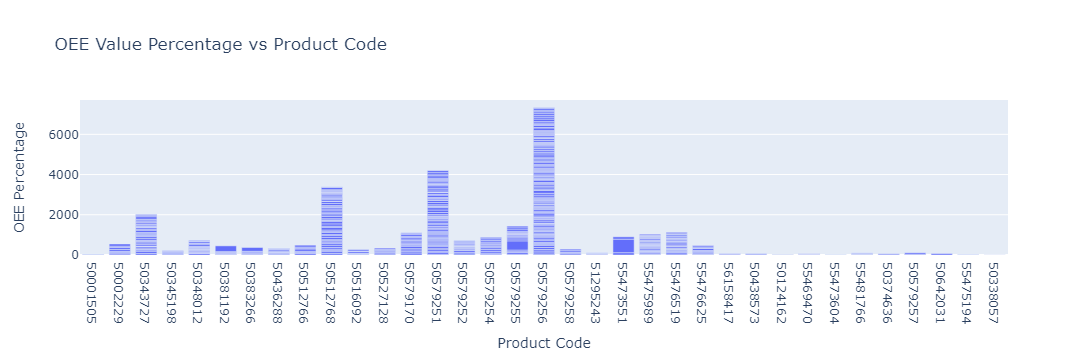

In [40]:
import plotly.graph_objects as go

# Assuming you have a DataFrame named df with columns 'Product Code' and 'OEE_DT'

# Create a figure
fig = go.Figure()

# Add a bar graph
fig.add_trace(go.Bar(x=df['Product Code'], y=df['OEE_DT'],
                     name='OEE Percentage'))

# Update layout
fig.update_layout(title='OEE Value Percentage vs Product Code',
                  xaxis_title='Product Code',
                  yaxis_title='OEE Percentage')

# Show the plot
fig.show()
